# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### `HR Analytics`

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### `Attrition in HR`

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.


How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### `Attrition affecting Companies`

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('IBM_HR_Analytics_data.csv')
pd.set_option("display.max_columns",None)
df.head(7)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   
6   59        No      Travel_Rarely       1324  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   
6                 3          3        Medical              1              10   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   
5                        4    Male          79               3         1   
6                        3  Female          81               4         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   
5  Laboratory Technician                4        Single           3068   
6  Laboratory Technician                1       Married           2670   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   
5        11864                   0      Y       No                 13   
6         9964                   4      Y      Yes                 20   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   
5                  3                         3             80   
6                  4                         1             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   
5                 0                  8                      2   
6     

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

## About the columns:

#### Target:-
`Attrition`:-  identifying why employees voluntarily leave, what might have prevented them from leaving, and how we can use data to predict attrition risk.
### Features:-
almost all of the features are self explanatory, here I am explaining some important features which might be new for fresherss.

As
- `EnvironmentStatisfaction`:- how much satisfied with the environment of the organizations they work for. The bigger the number, the more satisfaction.
- `HourlyRate`:- it is the amount of money that is charged,paid or earned for every hour worked.
- `Job Level`:- It is much  similar with designation. The higher the number the bigger the post.
- ` job Satisfaction`:- It is much similar as rating. 

In [4]:
## checking the shape of our dataset
df.shape

(1470, 35)

There are 1470 rows and 35 columns including target.

#### Checking Nulls

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

<AxesSubplot:>

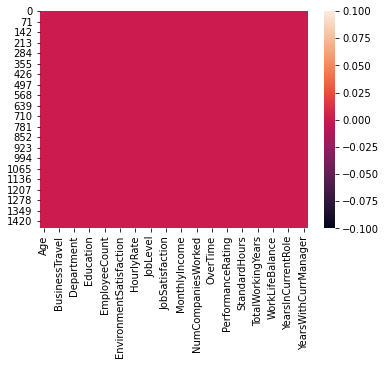

In [5]:
print(df.isna().any())
print(df.isna().sum())
sns.heatmap(df.isna())

Great!! There is no nulls present in our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Our dataset have the categorical features and as well as numerical features.
- There are some columns which are object data type, even our target variable is also object data type.
-  The Target variable `Attrition` of the employees. It could be either 'Yes' or 'No'. Hence we can say that it is a binary classification problem.

## Statistical Summary

In [7]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

## Outputs:
- The maximum age of the employee as working with an organization is  60. Which is obvious that after 60 year of age every one have to get retire from his  job.
- The maximum rate of employee per hour is 100 and minimum is 30.
- Seems Employee Number is an nomial data. It is only for name sake.


In [8]:
df.corr()

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EmployeeCount                  NaN        NaN               NaN        NaN   
EmployeeNumber           -0.010145  -0.050990          0.032916   0.042070   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StandardHours                  NaN        NaN               NaN        NaN   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EmployeeCount  EmployeeNumber  \
Age                                 NaN       -0.010145   
DailyRate                           NaN       -0.050990   
DistanceFromHome                    NaN        0.032916   
Education                           NaN        0.042070   
EmployeeCount                       NaN             NaN   
EmployeeNumber                      NaN        1.000000   
EnvironmentSatisfaction             NaN        0.017621   
HourlyRate                          NaN        0.035179   
JobInvolvement                      NaN       -0.006888   
JobLevel                            NaN       -0.018519   
JobSatisfaction                     NaN       -0.046247   
MonthlyIncome                       NaN       -0.014829   
MonthlyRate                         NaN        0.012648   
NumCompaniesWorked                  NaN       -0.001251   
PercentSalaryHike                   NaN       -0.012944   
PerformanceRating                   NaN       -0.020359   
RelationshipSatisfaction            NaN       -0.069861   
StandardHours                       NaN             NaN   
StockOptionLevel                    NaN        0.062227   
TotalWorkingYears                   NaN       -0.014365   
TrainingTimesLastYear               NaN        0.023603   
WorkLifeBalance                     NaN        0.010309   
YearsAtCompany                      NaN       -0.011240   
YearsInCurrentRole                  NaN       -0.008416   
YearsSinceLastPromotion             NaN       -0.009019   
YearsWithCurrManager                NaN       -0.009197   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Educat

- EmployeeCount and StandardHour features have not any information. We will check it once again and if necessary we will drop them as well.

# EDA
Checking the  count of  the target.

In [9]:
print(df.Attrition.value_counts())
plt.figure(figsize=(10,7))
sns.countplot(df.Attrition)

plt.show()

No     1233
Yes     237
Name: Attrition, dtype: int64


<AxesSubplot:ylabel='Attrition'>

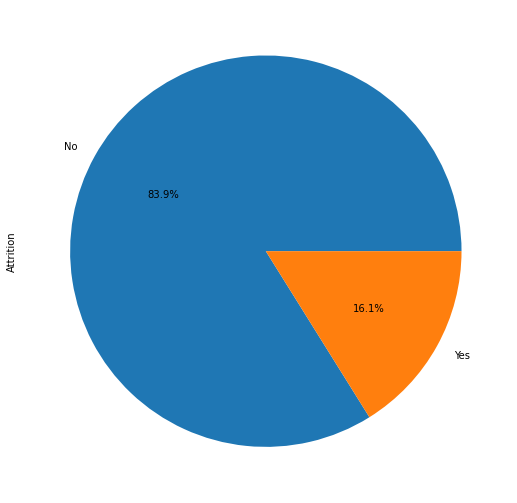

In [10]:
plt.figure(figsize=(9,9))
df.Attrition.value_counts().plot.pie(autopct='%1.1f%%')

As we can see from above graphs that 84% Employees not want to  leave company and 16.1%  employees want to leave the organization. So that we can say that we have biased classess, which is the distinctive example of Imbalanced Classification Problem. We will use Over-Sampling or Under-Sampling technique to handle this  type of problem. we will see it later.

## Visualization 
First we will separate the column according to it's  type. It will help to graph clearily.


In [11]:
## separating categorial columns.
cat_col=df.select_dtypes('object')
cat_col

Attrition     BusinessTravel              Department EducationField  \
0          Yes      Travel_Rarely                   Sales  Life Sciences   
1           No  Travel_Frequently  Research & Development  Life Sciences   
2          Yes      Travel_Rarely  Research & Development          Other   
3           No  Travel_Frequently  Research & Development  Life Sciences   
4           No      Travel_Rarely  Research & Development        Medical   
...        ...                ...                     ...            ...   
1465        No  Travel_Frequently  Research & Development        Medical   
1466        No      Travel_Rarely  Research & Development        Medical   
1467        No      Travel_Rarely  Research & Development  Life Sciences   
1468        No  Travel_Frequently                   Sales        Medical   
1469        No      Travel_Rarely  Research & Development        Medical   

      Gender                    JobRole MaritalStatus Over18 OverTime  
0     Female            Sales Executive        Single      Y      Yes  
1       Male         Research Scientist       Married      Y       No  
2       Male      Laboratory Technician        Single      Y      Yes  
3     Female         Research Scientist       Married      Y      Yes  
4       Male      Laboratory Technician       Married      Y       No  
...      ...                        ...           ...    ...      ...  
1465    Male      Laboratory Technician       Married      Y       No  
1466    Male  Healthcare Representative       Married      Y       No  
1467    Male     Manufacturing Director       Married      Y      Yes  
1468    Male            Sales Executive       Married      Y       No  
1469    Male      Laboratory Technician       Married      Y       No  

[1470 rows x 9 columns]

In [12]:
def cate_col(feature):
    plt.figure(figsize=(8,5))
    sns.countplot(x=feature,data=df)
    plt.xticks(rotation=90)
    print(df[feature].value_counts(normalize=True))
    


Travel_Rarely        0.709524
Travel_Frequently    0.188435
Non-Travel           0.102041
Name: BusinessTravel, dtype: float64


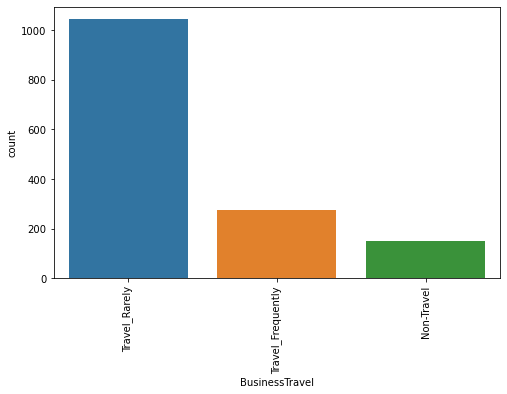

In [13]:
cate_col('BusinessTravel')

### Points to Note:
- around 70 % employees are rarely go for business travel.
- around 19 % employees frequently go for business travel.
- and only  10% employees do not go for business travel.

It means that most of the employees did not asked for travelling.

Research & Development    0.653741
Sales                     0.303401
Human Resources           0.042857
Name: Department, dtype: float64


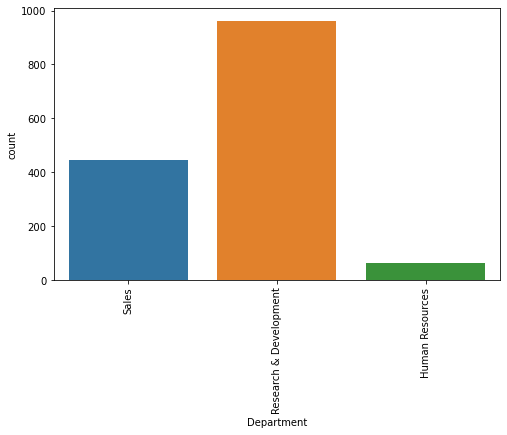

In [14]:
cate_col('Department')

- The number of employee in R&D department is highest.
- and the number of employee in Human Resources(HR) is very less.

Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: EducationField, dtype: float64


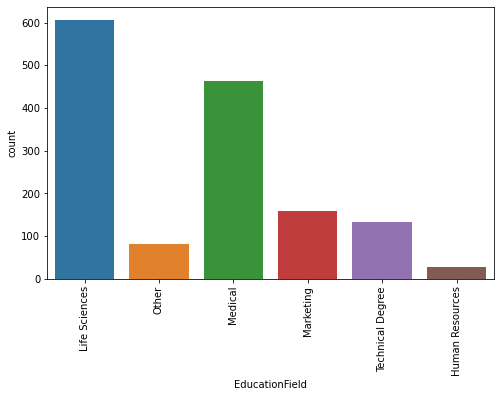

In [15]:
cate_col('EducationField')

- Organization has highest number of employees those belong to life science education background.
- organization has least number of employees those belong to human resource education background.
- And It is obvious that the company has a limited number of post in HR.

In [16]:
cate_col('Gender')

Male      0.6
Female    0.4
Name: Gender, dtype: float64


there is higher number of Male employees in the organization.

Sales Executive              0.221769
Research Scientist           0.198639
Laboratory Technician        0.176190
Manufacturing Director       0.098639
Healthcare Representative    0.089116
Manager                      0.069388
Sales Representative         0.056463
Research Director            0.054422
Human Resources              0.035374
Name: JobRole, dtype: float64


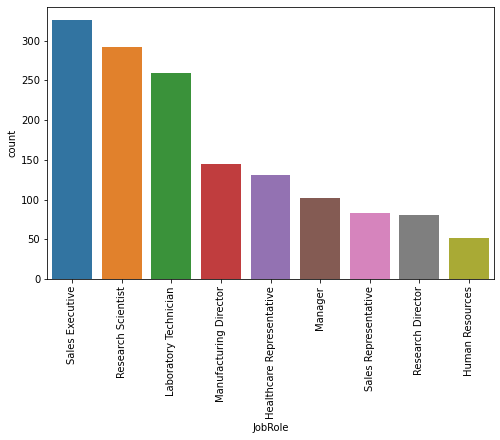

In [17]:
cate_col('JobRole')

- The number of employee is highest in Sales Department.
- The number of employee is least Human Resources.

It is clear that every organization wants to increase its sales and for that they hires more and more sales executives.

In [18]:
cate_col('MaritalStatus')

Married     0.457823
Single      0.319728
Divorced    0.222449
Name: MaritalStatus, dtype: float64


The married employees are most in company. 

In [19]:
plt.figure(figsize=(12,9))
sns.countplot(x='Age',data=df)
plt.xticks(rotation=90)
plt.show()

- Organization's most employees belong to young group. Most employees age falling in range of 38 to 40.

<AxesSubplot:xlabel='Age', ylabel='Density'>

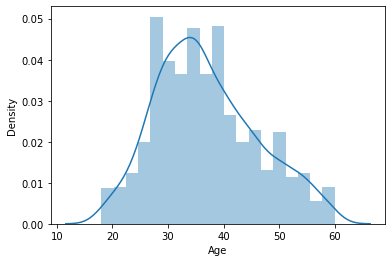

In [20]:
sns.distplot(df['Age'])

In [21]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [22]:
df_int=df.select_dtypes('int64')
df_int

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
0      41       1102                 1          2              1   
1      49        279                 8          1              1   
2      37       1373                 2          2              1   
3      33       1392                 3          4              1   
4      27        591                 2          1              1   
...   ...        ...               ...        ...            ...   
1465   36        884                23          2              1   
1466   39        613                 6          1              1   
1467   27        155                 4          3              1   
1468   49       1023                 2          3              1   
1469   34        628                 8          3              1   

      EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
0                  1                        2          94               3   
1                  2                        3          61               2   
2                  4                        4          92               2   
3                  5                        4          56               3   
4                  7                        1          40               3   
...              ...                      ...         ...             ...   
1465            2061                        3          41               4   
1466            2062                        4          42               2   
1467            2064                        2          87               4   
1468            2065                        4          63               2   
1469            2068                        2          82               4   

      JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
0            2                4           5993        19479   
1            2                2           5130        24907   
2            1                3           2090         2396   
3            1                3           2909        23159   
4            1                2           3468        16632   
...        ...              ...            ...          ...   
1465         2                4           2571        12290   
1466         3                1           9991        21457   
1467         2                2           6142         5174   
1468         2                2           5390        13243   
1469         2                3           4404        10228   

      NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0                      8                 11                  3   
1                      1                 23                  4   
2                      6                 15                  3   
3                      1                 11                  3   
4                      9                 12                  3   
...                  ...                ...                ...   
1465                   4                 17                  3   
1466                   4                 15                  3   
1467                   1                 20                  4   
1468                   2                 14                  3   
1469                   2                 12                  3   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                            1             80                 0   
1                            4             80                 1   
2                            2             80                 0   
3                            3             80                 0   
4                            4             80                 1   
...                        ...            ...               ...   
1465                         3             80                 1   
1466                         1             80                 1   
1467                         2             80                 1   
1468                         4             8

In [23]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_int.columns:
    if plotnumber<100:
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(x=df[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:-
- `DailyRate`,`EmployeeNumber`,`EmployeeCount`,`HourlyRate` and `MonthlyRate` features have almost equal data for all. If we drop them, it will not effect to our target.
- most of the employees salary hike percentage between 11 to 15%.
- the average monthly salary lie between 3 to 7 thousands doller.

we have various categorical feature in our dataset. The countplot and barplot give us the best result about the features.
and always use cross tab for explain categorical feature because it tells us n number of stories.

We will define a function to use count plot and crosstab together.

In [24]:
def plot_cat(feature):
    plt.figure(figsize=(10,7))
    sns.factorplot(x='Attrition',col=feature,kind='count',data=df,size=4)
    crosstab=pd.crosstab(columns=df['Attrition'],index=df[feature],normalize='index')
    return crosstab

In [25]:
plot_cat('Education')

Attrition        No       Yes
Education                    
1          0.817647  0.182353
2          0.843972  0.156028
3          0.826923  0.173077
4          0.854271  0.145729
5          0.895833  0.104167

<Figure size 720x504 with 0 Axes>

## observation:
- those employees have level 3 type education, do not want to exit from the organization.

Attrition                      No       Yes
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529

<Figure size 720x504 with 0 Axes>

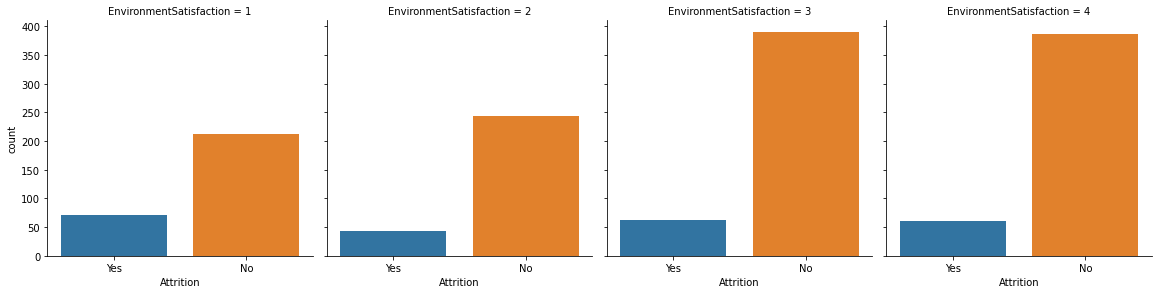

In [26]:
plot_cat('EnvironmentSatisfaction')

### Output:-
- Those employees rated the Environment Satisfaction as 3 and 4, do not want to quit the organization.
-  It is obvious that if employees likes it's work environment then their is a less number of chance to quit the job.

Attrition             No       Yes
JobInvolvement                    
1               0.662651  0.337349
2               0.810667  0.189333
3               0.855991  0.144009
4               0.909722  0.090278

<Figure size 720x504 with 0 Axes>

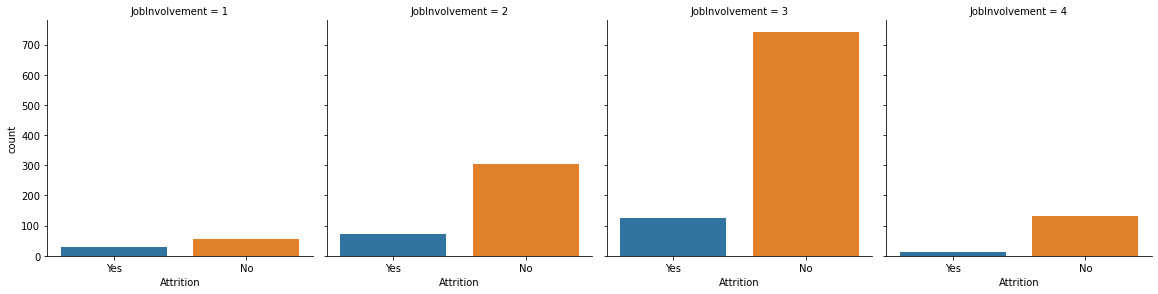

In [27]:
plot_cat('JobInvolvement')

job involvement refers to  psychological and emotional attachment with his work. If it's job involvement rating is 3 or 4 then their chance of quitting the job is very less. And it is simple to understand that if employee love it's work then he will not leave the organization.

In [28]:
plot_cat('NumCompaniesWorked')

Attrition                 No       Yes
NumCompaniesWorked                    
0                   0.883249  0.116751
1                   0.811900  0.188100
2                   0.890411  0.109589
3                   0.899371  0.100629
4                   0.877698  0.122302
5                   0.746032  0.253968
6                   0.771429  0.228571
7                   0.770270  0.229730
8                   0.877551  0.122449
9                   0.769231  0.230769

<Figure size 720x504 with 0 Axes>

if employee worked in 2 to 3 companies before they did not want to leave organization. There could be the reason that may be employee want to start focusing on it's career and may be they want to gain good experience in it's field for better future.

Attrition               No       Yes
StockOptionLevel                    
0                 0.755943  0.244057
1                 0.906040  0.093960
2                 0.924051  0.075949
3                 0.823529  0.176471

<Figure size 720x504 with 0 Axes>

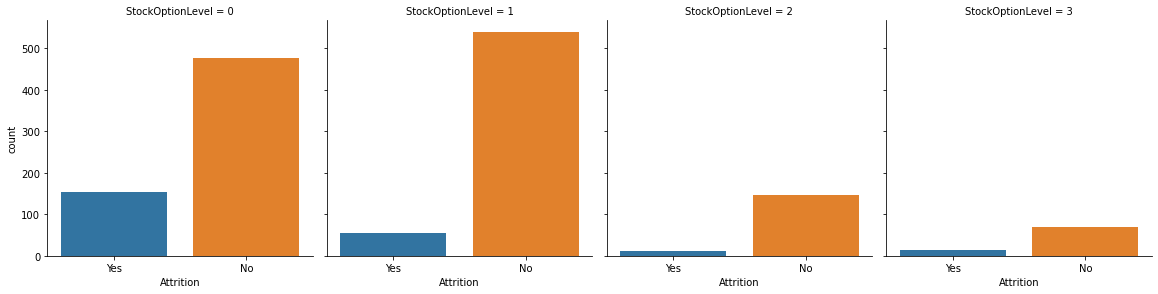

In [29]:
plot_cat('StockOptionLevel')

Stock Option Level 0 or 1 having employee less chance to exist from company.

In [30]:
sns.barplot(y='TotalWorkingYears',x='Attrition',data=df)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

 If employee have good number of experience then their chance of leaving is less.

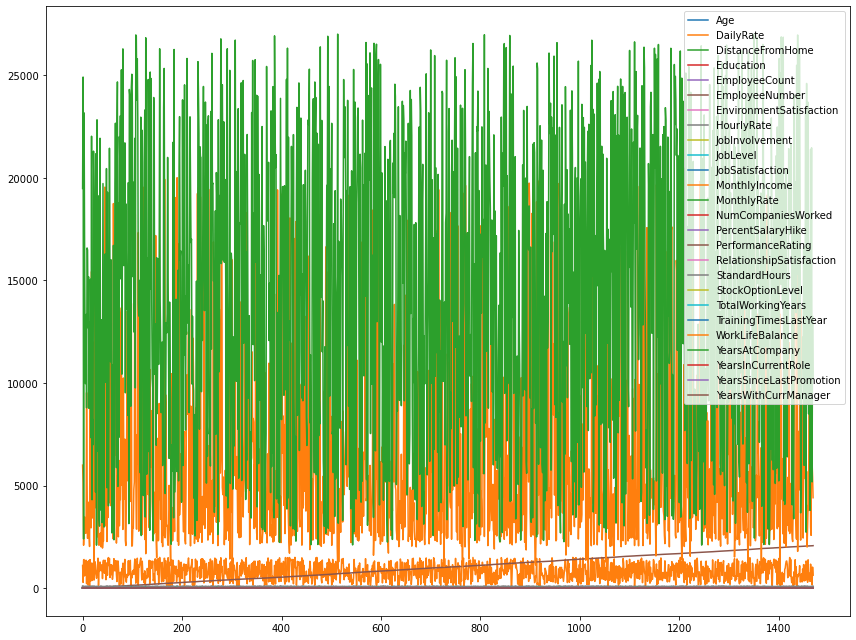

In [31]:
df_int.plot.line(figsize=(12,9))
plt.tight_layout()

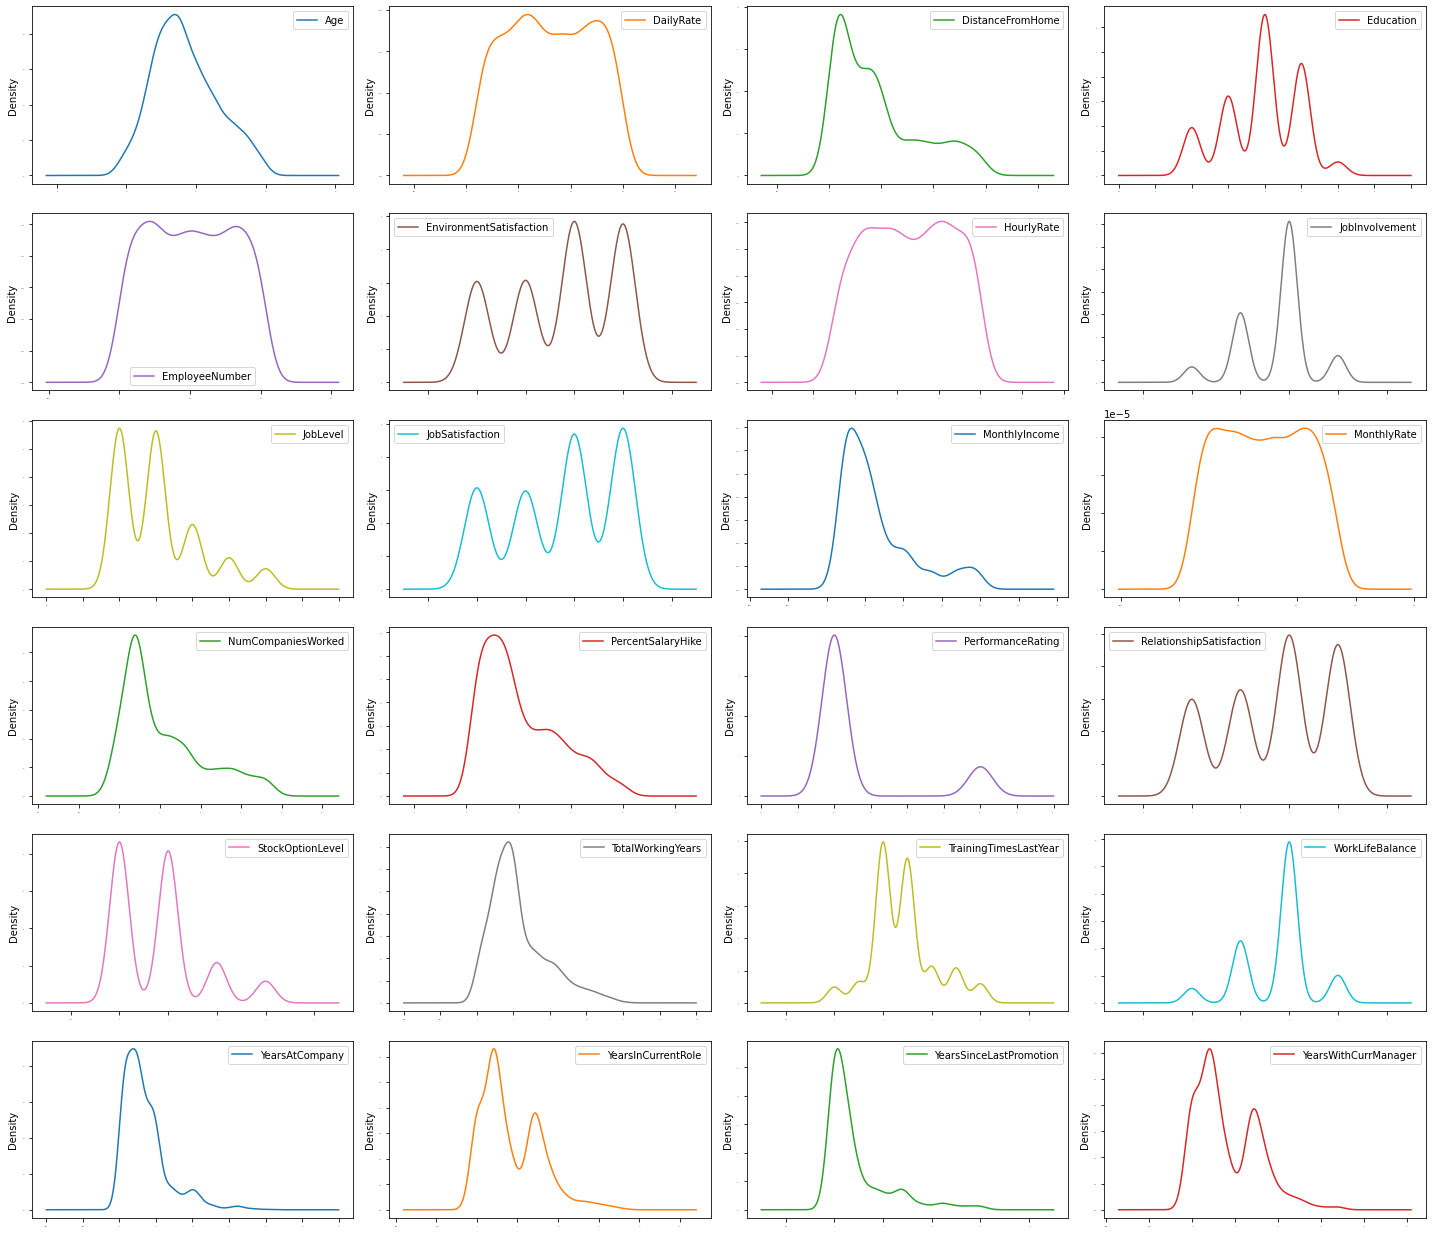

In [32]:
# plottig the density plot as we have good amount of features available.
## before that we have to drop those columns which has single information
df_int=df_int.drop(columns=['EmployeeCount','StandardHours'],axis=1)
df_int.plot(kind='density',subplots=True,layout=(7,4),sharex=False,legend=True,fontsize=1,figsize=(20,20))
plt.tight_layout()

# Checking Outliers:

In [33]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_int.columns:
    if plotnumber<100:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(x=df_int[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Observation:-
There is some outliers present in our features. Let's take them one by one.
- `MonthlyIncome`:- mothly income showing outliers, but we can not drop those outliers because may be it's possible that Senior employees paid larger than others.
- `NumCompaniesWorked`:- There is less chance that some one worked for around 10 companies before. May be it could be a wrong entry. 
- `PerfomanceRating` and `StockOptionLevel` features have ordinal data. we will not treat them.
- `TotalWorkingYears`:- Some employees have been  working with this organization for last 30 years. It could be the Plant head or Director or Head of the Daperment.
- Similarly for `YearsAtCompany`.
- `YearsInCurrentRole`:- Most of the companies hire whom are professionals in their field and having more than 15 years experience.
- `YearSinceLastPromotion`:- There is the very less chance that anyone did not promoted from last 8 years. There could be the  possiblilty of wrong entry.

## Conclusion:-
We will use zscore for treating outliers.

## Handling outliers using zscore

In [34]:
## First we separate features having outliers and not categorical
## we can not use zscore for categorical data type
features=['MonthlyIncome','TotalWorkingYears','YearsSinceLastPromotion','YearsAtCompany','YearsInCurrentRole',
         'TrainingTimesLastYear']

from scipy.stats import zscore
z_score=zscore(df[features])
abs_z_score=np.abs(z_score)

In [35]:
filtering_entry=(abs_z_score<3).all(axis=1)
df_new=df[filtering_entry]
print('Pervious shpae : ', df.shape)
print('After removing outliers Shape : ', df_new.shape)

Pervious shpae :  (1470, 35)
After removing outliers Shape :  (1393, 35)


## DataLoss

In [36]:
loss=(1470-1393)/1470*100
print('The Loss of the data is : ', loss)

The Loss of the data is :  5.238095238095238


Data loss percentage is below 10% which is okk.

## Plotting heatmap

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,fmt='.2f',linecolor='b')
plt.show()

## Observation:
- Monthly Income is very high correlated with joblevel. It could be happen as senior employees must have earn more .
- performanceRating is highly correlated with percentsalaryhike. It is because every employee salary hike depends on one of the factor as performance ratings.
- Also total working year is highly correlated with monthly income and job level. which is obvious that  senior employees must have pay paid larger of time.
- YearAtCompany is quite enough related with YearswithCurrmanager , which is fine.
- and also yearAtCompany is related to yearinCurrenRole. Which could be obvious.

## Visualize the correlation with Target.

In [38]:
df_int['Attrition']=df['Attrition']
df_int['Attrition']=df_int.Attrition.replace({'Yes':1,'No':0})
df_int.drop('Attrition',axis=1).corrwith(df_int.Attrition).plot(kind='bar',grid=True,figsize=(17,10),title='Correlation with target')
plt.tight_layout()

- Note that most of feature is negatively correlated with target variable which is obvious. Let's take one feature `Total Working Years` showing highest negative correaltion with our target variable which means that As number of total working years increasing the chance of job quiting by any employee decreasing. 

- `Job level`, `Age`, `TotalWorkingYears`,`YearInCurrentRole`, `YearWithCumManager` these feature showing highest correaltion with our target variable.
- ` PerformanceRating`,`PercentSalaryHike`,`HourlyRate` and `EmployeeNumber` is very less related with our target variable.

## Conclusion:-
## Dropping columns:-
- ` Job level` with correlated with ` TotalWorkingYears` and `MonthlyIncome` with 75% and 94% respectively.But `MonthlyIncome` is 74% correlate with `TotalWorkingYears`.And also we can see in above correlation graph that `MonthlyIncome` is least related with target among them. So we will drop `MonthlyIncome` here.
- `PercentSalaryHike`,`HourlyRate` and `EmployeeNumber` is hardly  related with target so we will also drop them.
- `PerformanceRating` and `PercentSalaryHike` is 77% correlated with target variable. So We will drop `PercentSalaryHike` feature here.
- `StandardHours` and `EmployeeCount` features have nomial data so we will drop them also.
- `Over18` feature has Single data as "YES". So we will drop it also.

In [39]:
df_new

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

In [40]:
## dropping the columns
df_new=df_new.drop(columns=['HourlyRate','EmployeeNumber','PercentSalaryHike','MonthlyIncome'], axis=1)

In [41]:

df_new=df_new.drop(columns=['Over18','StandardHours','EmployeeCount'],axis=1)

## Checking Skewness:

In [42]:
df_new.skew()

Age                         0.466048
DailyRate                  -0.015366
DistanceFromHome            0.955957
Education                  -0.293474
EnvironmentSatisfaction    -0.322066
JobInvolvement             -0.501241
JobLevel                    1.116566
JobSatisfaction            -0.343818
MonthlyRate                 0.030727
NumCompaniesWorked          1.039124
PerformanceRating           1.930917
RelationshipSatisfaction   -0.296152
StockOptionLevel            0.962114
TotalWorkingYears           1.022293
TrainingTimesLastYear       0.579000
WorkLifeBalance            -0.560781
YearsAtCompany              1.246294
YearsInCurrentRole          0.731451
YearsSinceLastPromotion     1.750913
YearsWithCurrManager        0.808041
dtype: float64

We will not handle skewness for categorical data.

In [43]:
skewed_feature=['YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole','YearsAtCompany','TrainingTimesLastYear',
               'TotalWorkingYears','WorkLifeBalance','NumCompaniesWorked','StockOptionLevel','PerformanceRating','JobLevel','DistanceFromHome']
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in skewed_feature:
    df_new[i]=pt.fit_transform(df_new[i].values.reshape(-1,1))
df_new.skew()
   

Age                         0.466048
DailyRate                  -0.015366
DistanceFromHome           -0.008502
Education                  -0.293474
EnvironmentSatisfaction    -0.322066
JobInvolvement             -0.501241
JobLevel                    0.109905
JobSatisfaction            -0.343818
MonthlyRate                 0.030727
NumCompaniesWorked          0.015994
PerformanceRating           0.000000
RelationshipSatisfaction   -0.296152
StockOptionLevel            0.088202
TotalWorkingYears          -0.010864
TrainingTimesLastYear       0.058390
WorkLifeBalance            -0.011397
YearsAtCompany             -0.024883
YearsInCurrentRole         -0.069748
YearsSinceLastPromotion     0.210869
YearsWithCurrManager       -0.063750
dtype: float64

In [44]:
df_new.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0         -1.490604          2  Life Sciences                        2   
1          0.243610          1  Life Sciences                        3   
2         -1.029362          2          Other                        4   
3         -0.699320          4  Life Sciences                        4   
4         -1.029362          1        Medical                        1   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0  Female               3  0.344808        Sales Executive                4   
1    Male               2  0.344808     Research Scientist                2   
2    Male               2 -1.143230  Laboratory Technician                3   
3  Female               3 -1.143230     Research Scientist                3   
4    Male               3 -1.143230  Laboratory Technician                2   

  MaritalStatus  MonthlyRate  NumCompaniesWorked OverTime  PerformanceRating  \
0        Single        19479            1.621335      Yes                0.0   
1       Married        24907           -0.563760       No                0.0   
2        Single         2396            1.273874      Yes                0.0   
3       Married        23159           -0.563760      Yes                0.0   
4       Married        16632            1.764985       No                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1         -1.086364          -0.179377   
1                         4          0.547070           0.140490   
2                         2         -1.086364          -0.356743   
3                         3         -1.086364          -0.179377   
4                         4          0.547070          -0.549022   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.612459        -2.144330        0.223585            0.283842   
1               0.217708         0.276008        0.933856            0.998454   
2               0.217708         0.276008       -2.158250           -1.573560   
3               0.217708         0.276008        0.610015            0.998454   
4               0.217708         0.276008       -0.936149           -0.395866   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -1.075044              0.570535  
1                 0.187039              0.997811  
2                -1.075044             -1.532269  
3                 1.021489             -1.532269  
4                 0.716438             -0.348475

In [45]:
plt.figure(figsize=(20,20))
plotnumber=1
for i in df_new.columns:
    if df_new[i].dtypes=='int64':
        ax=plt.subplot(7,4,plotnumber)
        sns.distplot(x=df_new[i])
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.tight_layout()

## pair plot

<Figure size 1440x1440 with 0 Axes>

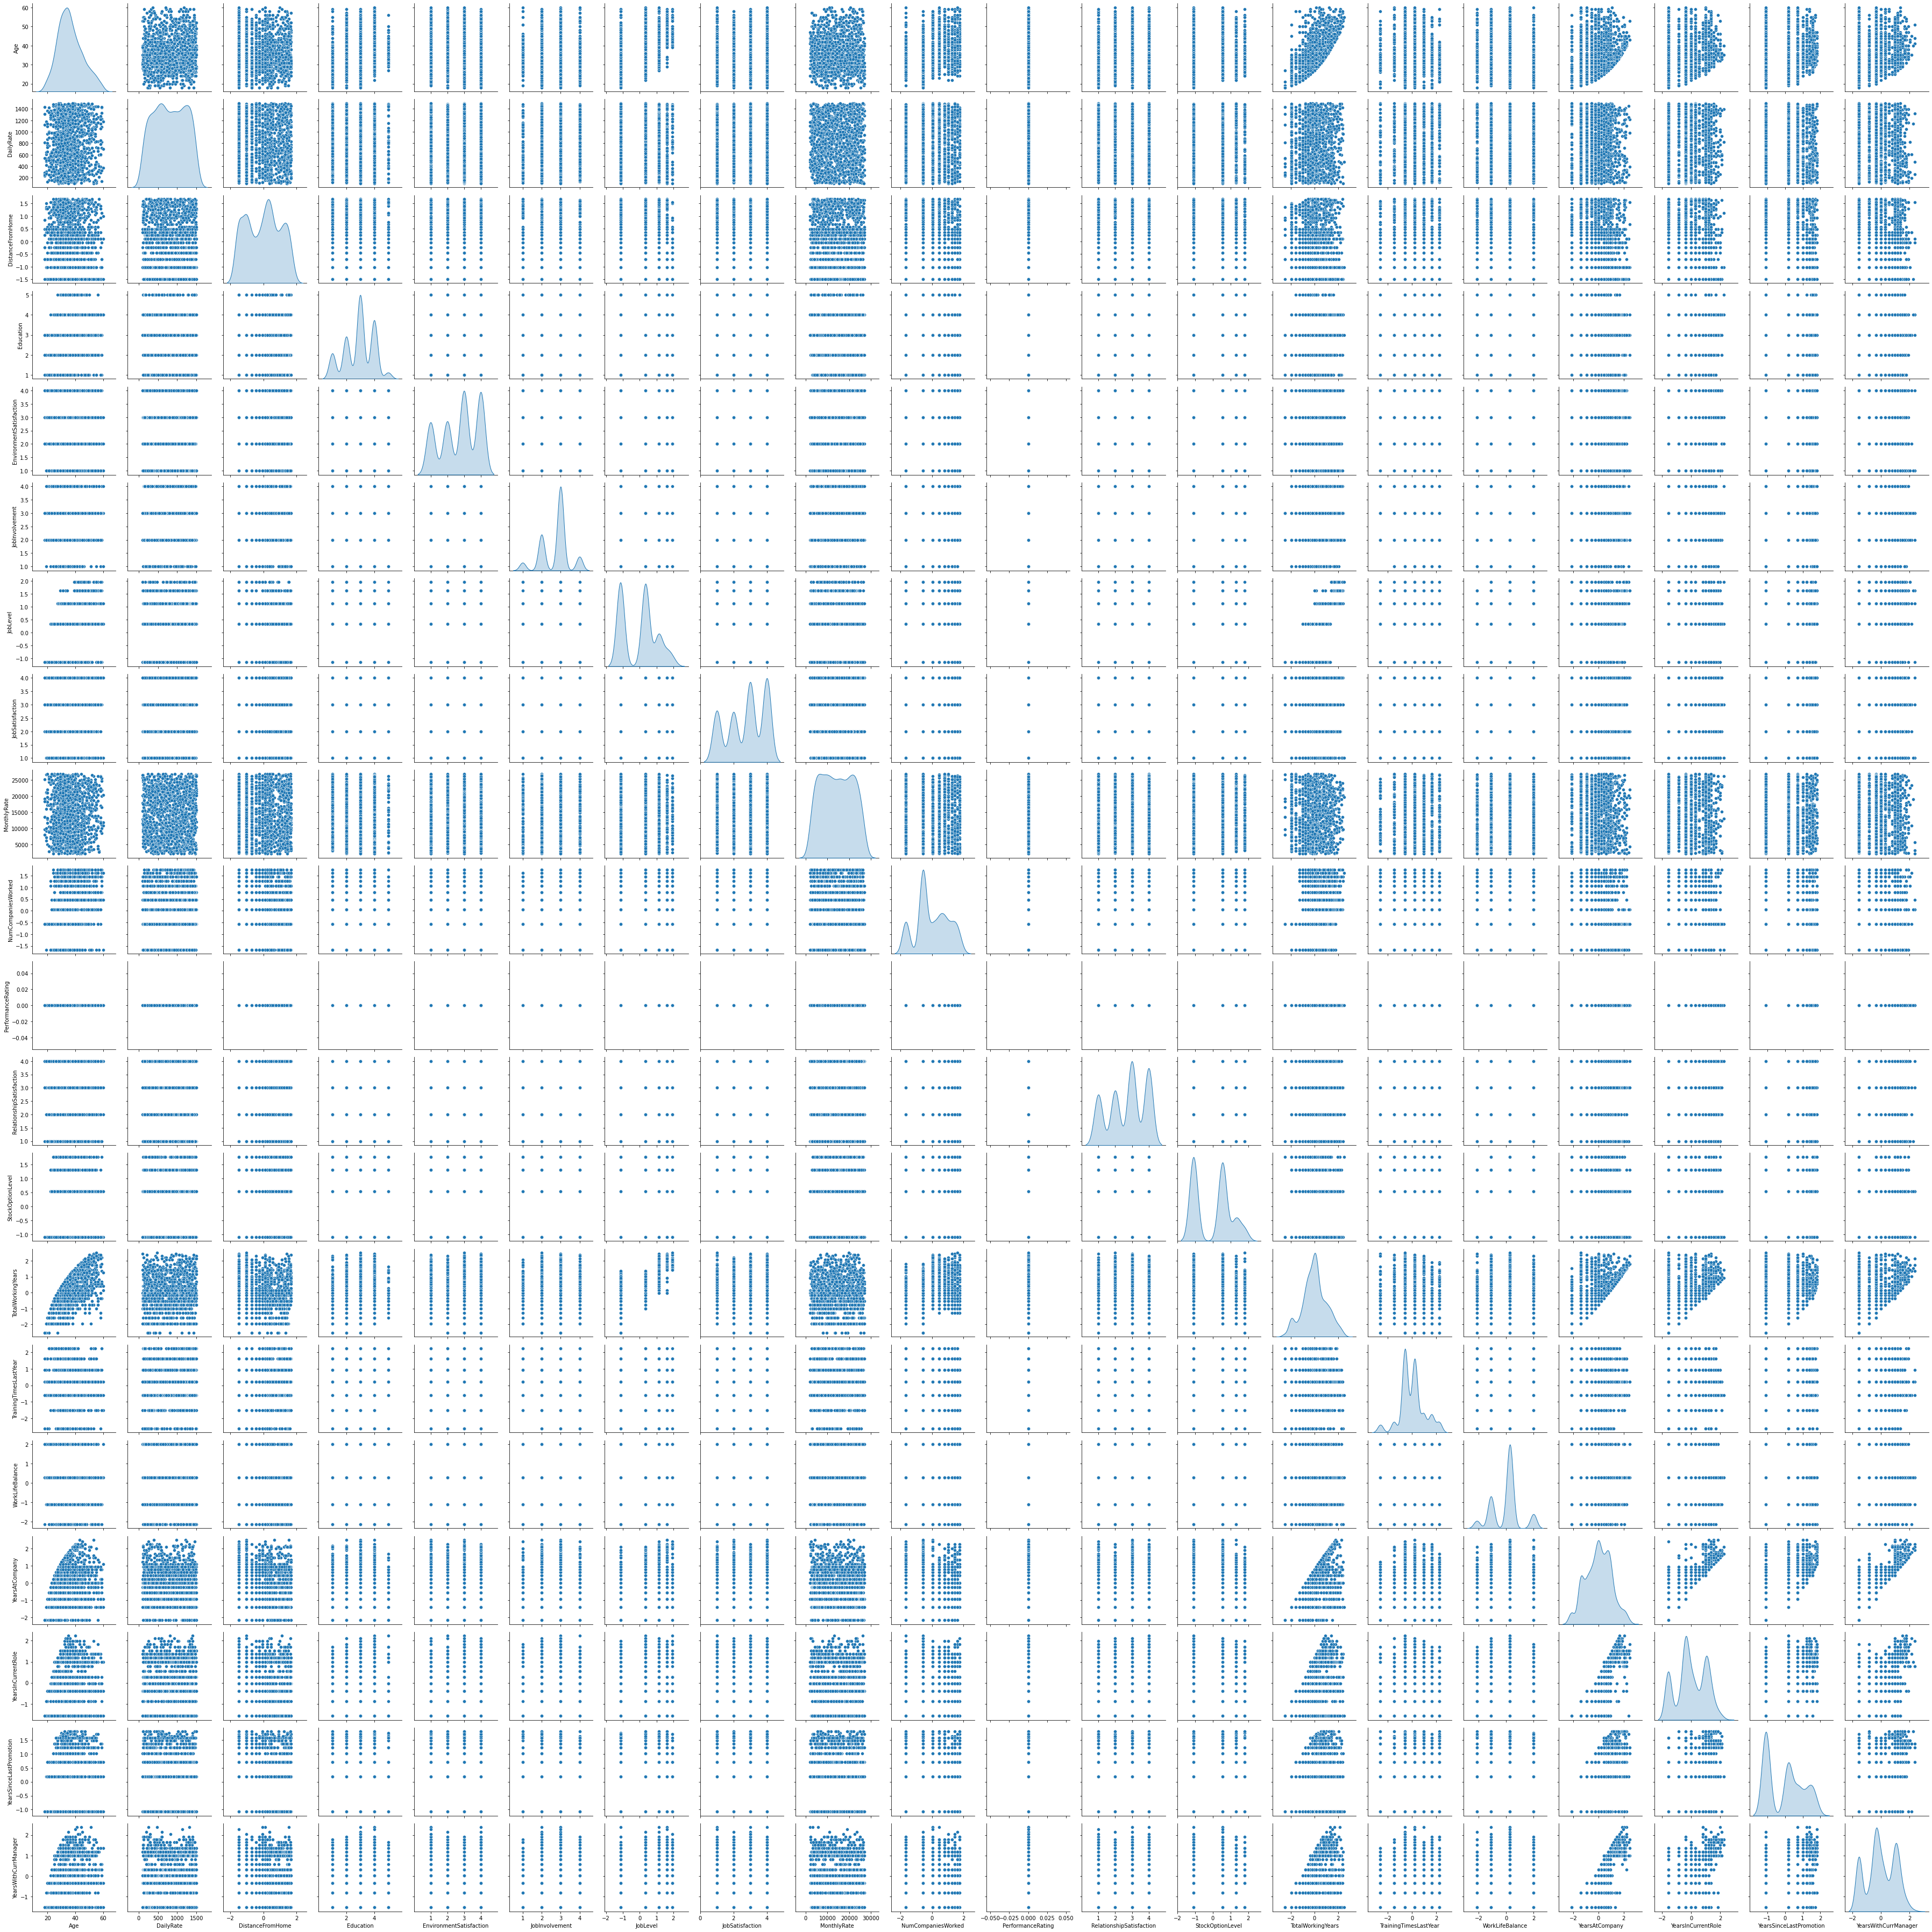

In [46]:
## pair plot
plt.figure(figsize=(20,20))
sns.pairplot(df_new,diag_kind='kde')
plt.tight_layout()

# Encoding For Categorical data.

We have some feature having object data type so before building a model we have to encode it so that our model understand these features as well.
#### Label Encoding
- Attrition
- Gender
- MaritalStatus
- OverTime
### get_dummies for
- BusinessTravel
- Dapartment
- EducationField
- JobRole

In [47]:
df_new.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0         -1.490604          2  Life Sciences                        2   
1          0.243610          1  Life Sciences                        3   
2         -1.029362          2          Other                        4   
3         -0.699320          4  Life Sciences                        4   
4         -1.029362          1        Medical                        1   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0  Female               3  0.344808        Sales Executive                4   
1    Male               2  0.344808     Research Scientist                2   
2    Male               2 -1.143230  Laboratory Technician                3   
3  Female               3 -1.143230     Research Scientist                3   
4    Male               3 -1.143230  Laboratory Technician                2   

  MaritalStatus  MonthlyRate  NumCompaniesWorked OverTime  PerformanceRating  \
0        Single        19479            1.621335      Yes                0.0   
1       Married        24907           -0.563760       No                0.0   
2        Single         2396            1.273874      Yes                0.0   
3       Married        23159           -0.563760      Yes                0.0   
4       Married        16632            1.764985       No                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1         -1.086364          -0.179377   
1                         4          0.547070           0.140490   
2                         2         -1.086364          -0.356743   
3                         3         -1.086364          -0.179377   
4                         4          0.547070          -0.549022   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.612459        -2.144330        0.223585            0.283842   
1               0.217708         0.276008        0.933856            0.998454   
2               0.217708         0.276008       -2.158250           -1.573560   
3               0.217708         0.276008        0.610015            0.998454   
4               0.217708         0.276008       -0.936149           -0.395866   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                -1.075044              0.570535  
1                 0.187039              0.997811  
2                -1.075044             -1.532269  
3                 1.021489             -1.532269  
4                 0.716438             -0.348475

In [48]:
### LabelEncoding
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [49]:
df_new['Attrition']=lab_enc.fit_transform(df_new['Attrition'].values.reshape(-1,1))
df_new['Gender']=lab_enc.fit_transform(df_new['Gender'].values.reshape(-1,1))
df_new['MaritalStatus']=lab_enc.fit_transform(df_new['MaritalStatus'].values.reshape(-1,1))
df_new['OverTime']=lab_enc.fit_transform(df_new['OverTime'].values.reshape(-1,1))

In [50]:
df_new.head(3)

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0         -1.490604          2  Life Sciences                        2   
1          0.243610          1  Life Sciences                        3   
2         -1.029362          2          Other                        4   

   Gender  JobInvolvement  JobLevel                JobRole  JobSatisfaction  \
0       0               3  0.344808        Sales Executive                4   
1       1               2  0.344808     Research Scientist                2   
2       1               2 -1.143230  Laboratory Technician                3   

   MaritalStatus  MonthlyRate  NumCompaniesWorked  OverTime  \
0              2        19479            1.621335         1   
1              1        24907           -0.563760         0   
2              2         2396            1.273874         1   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                0.0                         1         -1.086364   
1                0.0                         4          0.547070   
2                0.0                         2         -1.086364   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0          -0.179377              -2.612459        -2.144330        0.223585   
1           0.140490               0.217708         0.276008        0.933856   
2          -0.356743               0.217708         0.276008       -2.158250   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0            0.283842                -1.075044              0.570535  
1            0.998454                 0.187039              0.997811  
2           -1.573560                -1.075044             -1.532269

In [51]:
### Get_dummies
df1=pd.get_dummies(df_new[['BusinessTravel','Department','EducationField','JobRole']],drop_first=True)
df1

BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                    0                             1   
1                                    1                             0   
2                                    0                             1   
3                                    1                             0   
4                                    0                             1   
...                                ...                           ...   
1465                                 1                             0   
1466                                 0                             1   
1467                                 0                             1   
1468                                 1                             0   
1469                                 0                             1   

      Department_Research & Development  Department_Sales  \
0                                     0                 1   
1                                     1                 0   
2                                     1                 0   
3                                     1                 0   
4                                     1                 0   
...                                 ...               ...   
1465                                  1                 0   
1466                                  1                 0   
1467                                  1                 0   
1468                                  0                 1   
1469                                  1                 0   

      EducationField_Life Sciences  EducationField_Marketing  \
0                                1                         0   
1                                1                         0   
2                                0                         0   
3                                1                         0   
4                                0                         0   
...                            ...                       ...   
1465                             0                         0   
1466                             0                         0   
1467                             1                         0   
1468                             0                         0   
1469                             0                         0   

      EducationField_Medical  EducationField_Other  \
0                          0                     0   
1                          0                     0   
2                          0                     1   
3                          0                     0   
4                          1                     0   
...                      ...                   ...   
1465                       1                     0   
1466                       1                     0   
1467                       0                     0   
1468                       1                     0   
1469                       1                     0   

      EducationField_Technical Degree  JobRole_Human Resources  \
0                                   0                        0   
1                                   0                        0   
2                                   0                        0   
3                                   0                        0   
4                                   0                        0   
...                               ...                      ...   
1465                                0                        0   
1466                                0                        0   
1467                                0                        0   
1468                                0                        0   
1469                                0                        0   

      JobRole_Laboratory Technician  JobRole_Manager  \
0                                 0                0   
1                                 0                0   
2                            

In [52]:
## concate both dataframes.
df=pd.concat([df_new,df1],axis=1)
df=df.drop(columns=['BusinessTravel','Department','EducationField','JobRole'])
df

Age  Attrition  DailyRate  DistanceFromHome  Education  \
0      41          1       1102         -1.490604          2   
1      49          0        279          0.243610          1   
2      37          1       1373         -1.029362          2   
3      33          0       1392         -0.699320          4   
4      27          0        591         -1.029362          1   
...   ...        ...        ...               ...        ...   
1465   36          0        884          1.409368          2   
1466   39          0        613         -0.050614          1   
1467   27          0        155         -0.441716          3   
1468   49          0       1023         -1.029362          3   
1469   34          0        628          0.243610          3   

      EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  \
0                           2       0               3  0.344808   
1                           3       1               2  0.344808   
2                           4       1               2 -1.143230   
3                           4       0               3 -1.143230   
4                           1       1               3 -1.143230   
...                       ...     ...             ...       ...   
1465                        3       1               4  0.344808   
1466                        4       1               2  1.128637   
1467                        2       1               4  0.344808   
1468                        4       1               2  0.344808   
1469                        2       1               4  0.344808   

      JobSatisfaction  MaritalStatus  MonthlyRate  NumCompaniesWorked  \
0                   4              2        19479            1.621335   
1                   2              1        24907           -0.563760   
2                   3              2         2396            1.273874   
3                   3              1        23159           -0.563760   
4                   2              1        16632            1.764985   
...               ...            ...          ...                 ...   
1465                4              1        12290            0.797857   
1466                1              1        21457            0.797857   
1467                2              1         5174           -0.563760   
1468                2              1        13243            0.050812   
1469                3              1        10228            0.050812   

      OverTime  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0            1                0.0                         1         -1.086364   
1            0                0.0                         4          0.547070   
2            1                0.0                         2         -1.086364   
3            1                0.0                         3         -1.086364   
4            0                0.0                         4          0.547070   
...        ...                ...                       ...               ...   
1465         0                0.0                         3          0.547070   
1466         0                0.0                         1          0.547070   
1467         1                0.0                         2          0.547070   
1468         0                0.0                         4         -1.086364   
1469         0                0.0                         1         -1.086364   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0             -0.179377              -2.612459        -2.144330   
1              0.140490               0.217708         0.276008   
2             -0.356743               0.217708         0.276008   
3             -0.179377               0.217708         0.276008   
4             -0.549022               0.217708         0.276008   
...                 ...                    ...              ...   
1465           1.029621               0.217708         0.276008   
1466          -0.014287               1.609399

## Splitting the dataset

In [53]:
x=df.drop('Attrition',axis=1)
y=df.Attrition
x.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102         -1.490604          2                        2   
1   49        279          0.243610          1                        3   
2   37       1373         -1.029362          2                        4   

   Gender  JobInvolvement  JobLevel  JobSatisfaction  MaritalStatus  \
0       0               3  0.344808                4              2   
1       1               2  0.344808                2              1   
2       1               2 -1.143230                3              2   

   MonthlyRate  NumCompaniesWorked  OverTime  PerformanceRating  \
0        19479            1.621335         1                0.0   
1        24907           -0.563760         0                0.0   
2         2396            1.273874         1                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1         -1.086364          -0.179377   
1                         4          0.547070           0.140490   
2                         2         -1.086364          -0.356743   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.612459        -2.144330        0.223585            0.283842   
1               0.217708         0.276008        0.933856            0.998454   
2               0.217708         0.276008       -2.158250           -1.573560   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                -1.075044              0.570535   
1                 0.187039              0.997811   
2                -1.075044             -1.532269   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                                 0                             1   
1                                 1                             0   
2                                 0                             1   

   Department_Research & Development  Department_Sales  \
0                                  0                 1   
1                                  1                 0   
2                                  1                 0   

   EducationField_Life Sciences  EducationField_Marketing  \
0                             1                         0   
1                             1                         0   
2                             0                         0   

   EducationField_Medical  EducationField_Other  \
0                       0                     0   
1                       0                     0   
2                       0                     1   

   EducationField_Technical Degree  JobRole_Human Resources  \
0                                0                        0   
1                                0                        0   
2                                0                        0   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                              0                0   
1                              0                0   
2                              1                0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  
0                             0  
1                             0  
2                             0

In [54]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

## Scaling the dataset.

In [55]:
## standardScaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [56]:
for i in x.columns:
    x[i]=scaler.fit_transform(x[i].values.reshape(-1,1))
x.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.533748   0.735474         -1.490604  -0.879504                -0.662009   
1  1.439501  -1.305655          0.243610  -1.858058                 0.253759   
2  0.080871   1.407583         -1.029362  -0.879504                 1.169527   
3 -0.372006   1.454705         -0.699320   1.077603                 1.169527   
4 -1.051321  -0.531861         -1.029362  -1.858058                -1.577777   

     Gender  JobInvolvement  JobLevel  JobSatisfaction  MaritalStatus  \
0 -1.228784        0.377081  0.344808         1.145013       1.232552   
1  0.813813       -1.034947  0.344808        -0.671619      -0.139906   
2  0.813813       -1.034947 -1.143230         0.236697       1.232552   
3 -1.228784        0.377081 -1.143230         0.236697      -0.139906   
4  0.813813        0.377081 -1.143230        -0.671619      -0.139906   

   MonthlyRate  NumCompaniesWorked  OverTime  PerformanceRating  \
0     0.735995            1.621335  1.583924                0.0   
1     1.505717           -0.563760 -0.631343                0.0   
2    -1.686472            1.273874  1.583924                0.0   
3     1.257840           -0.563760  1.583924                0.0   
4     0.332274            1.764985 -0.631343                0.0   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                 -1.576479         -1.086364          -0.179377   
1                  1.199798          0.547070           0.140490   
2                 -0.651053         -1.086364          -0.356743   
3                  0.274372         -1.086364          -0.179377   
4                  1.199798          0.547070          -0.549022   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0              -2.612459        -2.144330        0.223585            0.283842   
1               0.217708         0.276008        0.933856            0.998454   
2               0.217708         0.276008       -2.158250           -1.573560   
3               0.217708         0.276008        0.610015            0.998454   
4               0.217708         0.276008       -0.936149           -0.395866   

   YearsSinceLastPromotion  YearsWithCurrManager  \
0                -1.075044              0.570535   
1                 0.187039              0.997811   
2                -1.075044             -1.532269   
3                 1.021489             -1.532269   
4                 0.716438             -0.348475   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                         -0.482435                      0.641364   
1                          2.072819                     -1.559178   
2                         -0.482435                      0.641364   
3                          2.072819                     -1.559178   
4                         -0.482435                      0.641364   

   Department_Research & Development  Department_Sales  \
0                          -1.381355          1.519470   
1                           0.723927         -0.658124   
2                           0.723927         -0.658124   
3                           0.723927         -0.658124   
4                           0.723927         -0.658124   

   EducationField_Life Sciences  EducationField_Marketing  \
0                      1.196271                 -0.347384   
1                      1.196271                 -0.347384   
2                     -0.835931                 -0.347384   
3                      1.196271                 -0.347384   
4                     -0.835931                 -0.347384   

   EducationField_Medical  EducationField_Other  \
0               -0.678357             -0.245197   
1               -0.678357             -0.245197   
2               -0.678357              4.078347   
3               -0.678357             -0.245197   
4                1.474151             -0.245197   

   EducationField_Technical Degree  Jo

In [57]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1393, dtype: int32

## Handling Imbalance data:
We have noticed in the starting that our dataset is skewed which is typically called as ImbalancedDataset. So we will use SMOTE method to get rid off this problem.


In [58]:
print(df.Attrition.value_counts())
print(df.Attrition.value_counts(normalize=True))

0    1164
1     229
Name: Attrition, dtype: int64
0    0.835607
1    0.164393
Name: Attrition, dtype: float64


## OverSampling using SMOTE

In [59]:
## importing smote
from imblearn.over_sampling import SMOTE
sm=SMOTE()


We Will apply it only for training dataset. so first split our dataset into train and test.

In [60]:
from sklearn.model_selection import train_test_split as tts

In [61]:
### importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#### Defining a function for finding the best Random State:

In [66]:
def random_state(model,feature,target):
    minimum=0
    for i  in range(1,201):
        x_train,x_test,y_train,y_test=tts(feature,target,test_size=0.2,random_state=i)
        over_sampling=SMOTE(0.75)
        x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
        model.fit(x_train_new,y_train_new)
        pred_train=model.predict(x_train)
        pred_test=model.predict(x_test)
        roc_score=roc_auc_score(y_test,pred_test)
        if roc_score>minimum:
            minimum=roc_score
            j=i
    return j


In [67]:
def print_score(clf,x,y,train=True):
    x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=random_state(clf,x,y))
    over_sampling=SMOTE(0.75)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    clf.fit(x_train_new,y_train_new)
    if train:
        y_pred= clf.predict(x_train_new)
        print("\n+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++")
        
        print(f"Accuracy Score : {accuracy_score(y_train_new,y_pred)*100:.2f}%")
        print("\n =================Confusion Matrix====================")
        print(confusion_matrix(y_train_new,y_pred))
        
        print("\n \n Test Classification Report \n" ,classification_report(y_train_new,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n =================Confusion Matrix====================")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

#### Defining a functionn for cross _Validation

In [68]:
from sklearn.model_selection import cross_val_score

def cross_val(Model,independent,dependent):
    x_train,x_test,y_train,y_test=tts(independent,dependent,test_size=0.2,random_state=random_state(Model,independent,dependent))
    over_sampling=SMOTE(0.75)
    x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)
    Model.fit(x_train_new,y_train_new)
    pred=Model.predict(x_test)
    for i in range(2,11):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')
        
        


# Logistic Regression

In [69]:
print_score(LogisticRegression(),x,y,train=True)
print_score(LogisticRegression(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 82.62%

 =================Confusion Matrix====================
[[786 135]
 [145 545]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       921
           1       0.80      0.79      0.80       690

    accuracy                           0.83      1611
   macro avg       0.82      0.82      0.82      1611
weighted avg       0.83      0.83      0.83      1611


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 82.08%

 =================Confusion Matrix====================
[[185  40]
 [ 10  44]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       225
           1       0.52      0.81      0.64        54

    accuracy                           0.82       27

## Cross validation for logistic regression

In [70]:
cross_val(LogisticRegression(),x,y)

At cv :-  2
Cross Validation score is :-  0.87724175035868
Accuracy score is :-  0.8709677419354839


At cv :-  3
Cross Validation score is :-  0.877953899394389
Accuracy score is :-  0.8709677419354839


At cv :-  4
Cross Validation score is :-  0.8793967987353029
Accuracy score is :-  0.8709677419354839


At cv :-  5
Cross Validation score is :-  0.8801294448312318
Accuracy score is :-  0.8709677419354839


At cv :-  6
Cross Validation score is :-  0.8822517389373982
Accuracy score is :-  0.8709677419354839


At cv :-  7
Cross Validation score is :-  0.8844221105527639
Accuracy score is :-  0.8709677419354839


At cv :-  8
Cross Validation score is :-  0.8836658456486042
Accuracy score is :-  0.8709677419354839


At cv :-  9
Cross Validation score is :-  0.8851510496671787
Accuracy score is :-  0.8709677419354839


At cv :-  10
Cross Validation score is :-  0.8808170606372047
Accuracy score is :-  0.8709677419354839




We see that our model is little bit under fitted .

# Decision Tree Classifier

In [71]:
print_score(DecisionTreeClassifier(),x,y,train=True)
print_score(DecisionTreeClassifier(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 100.00%

 =================Confusion Matrix====================
[[929   0]
 [  0 696]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       929
           1       1.00      1.00      1.00       696

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 78.49%

 =================Confusion Matrix====================
[[200  39]
 [ 21  19]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.84      0.87       239
           1       0.33      0.47      0.39        40

    accuracy                           0.78       2

## Cross validation for DecisionTree

In [72]:
cross_val(DecisionTreeClassifier(),x,y)

At cv :-  2
Cross Validation score is :-  0.7889487376111084
Accuracy score is :-  0.8279569892473119


At cv :-  3
Cross Validation score is :-  0.7846341614139168
Accuracy score is :-  0.8279569892473119


At cv :-  4
Cross Validation score is :-  0.7731675888416822
Accuracy score is :-  0.8279569892473119


At cv :-  5
Cross Validation score is :-  0.7767669735179599
Accuracy score is :-  0.8279569892473119


At cv :-  6
Cross Validation score is :-  0.7803481574663311
Accuracy score is :-  0.8279569892473119


At cv :-  7
Cross Validation score is :-  0.7817659727207465
Accuracy score is :-  0.8279569892473119


At cv :-  8
Cross Validation score is :-  0.7839244663382594
Accuracy score is :-  0.8279569892473119


At cv :-  9
Cross Validation score is :-  0.7660056789089047
Accuracy score is :-  0.8279569892473119


At cv :-  10
Cross Validation score is :-  0.7817882836587873
Accuracy score is :-  0.8279569892473119




There is little bit difference between cv score and accuracy score

# RandomForest

In [73]:
print_score(RandomForestClassifier(),x,y,train=True)
print_score(RandomForestClassifier(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 100.00%

 =================Confusion Matrix====================
[[931   0]
 [  0 698]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00       698

    accuracy                           1.00      1629
   macro avg       1.00      1.00      1.00      1629
weighted avg       1.00      1.00      1.00      1629


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 89.61%

 =================Confusion Matrix====================
[[235   4]
 [ 25  15]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       239
           1       0.79      0.38      0.51        40

    accuracy                           0.90       2

## Cross validation for RandomForest

In [74]:
cross_val(RandomForestClassifier(),x,y)

At cv :-  2
Cross Validation score is :-  0.8485267319711737
Accuracy score is :-  0.8673835125448028


At cv :-  3
Cross Validation score is :-  0.854988567544185
Accuracy score is :-  0.8673835125448028


At cv :-  4
Cross Validation score is :-  0.854992095642723
Accuracy score is :-  0.8673835125448028


At cv :-  5
Cross Validation score is :-  0.851393723730693
Accuracy score is :-  0.8673835125448028


At cv :-  6
Cross Validation score is :-  0.8542807458931478
Accuracy score is :-  0.8673835125448028


At cv :-  7
Cross Validation score is :-  0.8521177315147165
Accuracy score is :-  0.8673835125448028


At cv :-  8
Cross Validation score is :-  0.854995894909688
Accuracy score is :-  0.8673835125448028


At cv :-  9
Cross Validation score is :-  0.8528324721873108
Accuracy score is :-  0.8673835125448028


At cv :-  10
Cross Validation score is :-  0.8557245632065775
Accuracy score is :-  0.8673835125448028




cv score and accuracy score are almost same.

# Ada Boost

In [75]:
print_score(AdaBoostClassifier(),x,y,train=True)
print_score(AdaBoostClassifier(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 90.17%

 =================Confusion Matrix====================
[[847  72]
 [ 86 603]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91       919
           1       0.89      0.88      0.88       689

    accuracy                           0.90      1608
   macro avg       0.90      0.90      0.90      1608
weighted avg       0.90      0.90      0.90      1608


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 87.10%

 =================Confusion Matrix====================
[[214  24]
 [ 12  29]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92       238
           1       0.55      0.71      0.62        41

    accuracy                           0.87       27

## Cross validation for AdaBoost

In [76]:
cross_val(AdaBoostClassifier(),x,y)

At cv :-  2
Cross Validation score is :-  0.8628924866834875
Accuracy score is :-  0.8960573476702509


At cv :-  3
Cross Validation score is :-  0.8722222222222222
Accuracy score is :-  0.8960573476702509


At cv :-  4
Cross Validation score is :-  0.870782284359253
Accuracy score is :-  0.8960573476702509


At cv :-  5
Cross Validation score is :-  0.8700807096258478
Accuracy score is :-  0.8960573476702509


At cv :-  6
Cross Validation score is :-  0.8736433821715752
Accuracy score is :-  0.8960573476702509


At cv :-  7
Cross Validation score is :-  0.8815506101938263
Accuracy score is :-  0.8960573476702509


At cv :-  8
Cross Validation score is :-  0.8750779967159277
Accuracy score is :-  0.8960573476702509


At cv :-  9
Cross Validation score is :-  0.8722385141739981
Accuracy score is :-  0.8960573476702509


At cv :-  10
Cross Validation score is :-  0.8729239465570402
Accuracy score is :-  0.8960573476702509




little bit difference between corss val score and accuracy score.

# GradientBoosting

In [78]:
print_score(GradientBoostingClassifier(),x,y,train=True)
print_score(GradientBoostingClassifier(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 96.08%

 =================Confusion Matrix====================
[[928   4]
 [ 60 639]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       932
           1       0.99      0.91      0.95       699

    accuracy                           0.96      1631
   macro avg       0.97      0.95      0.96      1631
weighted avg       0.96      0.96      0.96      1631


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 88.89%

 =================Confusion Matrix====================
[[224  10]
 [ 21  24]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       234
           1       0.71      0.53      0.61        45

    accuracy                           0.89       27

## Cross validation for Gradient Boosting

In [79]:
cross_val(GradientBoostingClassifier(),x,y)

At cv :-  2
Cross Validation score is :-  0.8542738584079552
Accuracy score is :-  0.8960573476702509


At cv :-  3
Cross Validation score is :-  0.8700670498084291
Accuracy score is :-  0.8960573476702509


At cv :-  4
Cross Validation score is :-  0.8636189605770179
Accuracy score is :-  0.8960573476702509


At cv :-  5
Cross Validation score is :-  0.860743663134009
Accuracy score is :-  0.8960573476702509


At cv :-  6
Cross Validation score is :-  0.8643382171575157
Accuracy score is :-  0.8960573476702509


At cv :-  7
Cross Validation score is :-  0.867910983488873
Accuracy score is :-  0.8960573476702509


At cv :-  8
Cross Validation score is :-  0.8679064039408868
Accuracy score is :-  0.8960573476702509


At cv :-  9
Cross Validation score is :-  0.863613089419541
Accuracy score is :-  0.8960573476702509


At cv :-  10
Cross Validation score is :-  0.8643422404933195
Accuracy score is :-  0.8960573476702509




AT cv=3 we get the best score.

# K Nearest Neighbors

In [80]:
print_score(KNeighborsClassifier(),x,y,train=True)
print_score(KNeighborsClassifier(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 85.64%

 =================Confusion Matrix====================
[[710 225]
 [ 10 691]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.76      0.86       935
           1       0.75      0.99      0.85       701

    accuracy                           0.86      1636
   macro avg       0.87      0.87      0.86      1636
weighted avg       0.89      0.86      0.86      1636


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 74.55%

 =================Confusion Matrix====================
[[173  55]
 [ 16  35]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       228
           1       0.39      0.69      0.50        51

    accuracy                           0.75       27

## Cross validation for KNN

In [81]:
cross_val(KNeighborsClassifier(),x,y)

At cv :-  2
Cross Validation score is :-  0.834885552202378
Accuracy score is :-  0.7096774193548387


At cv :-  3
Cross Validation score is :-  0.8427805586454085
Accuracy score is :-  0.7096774193548387


At cv :-  4
Cross Validation score is :-  0.8463714059875507
Accuracy score is :-  0.7096774193548387


At cv :-  5
Cross Validation score is :-  0.842765787370104
Accuracy score is :-  0.7096774193548387


At cv :-  6
Cross Validation score is :-  0.8456508065709634
Accuracy score is :-  0.7096774193548387


At cv :-  7
Cross Validation score is :-  0.8499641062455134
Accuracy score is :-  0.7096774193548387


At cv :-  8
Cross Validation score is :-  0.8470771756978652
Accuracy score is :-  0.7096774193548387


At cv :-  9
Cross Validation score is :-  0.8477866219801704
Accuracy score is :-  0.7096774193548387


At cv :-  10
Cross Validation score is :-  0.8470811921891059
Accuracy score is :-  0.7096774193548387




After cross validation we can see that our model got highly underfitting.

# SVC

In [82]:
print_score(SVC(),x,y,train=True)
print_score(SVC(),x,y,train=False)



+++++++++++++++++++++++++++++++++++++Training Score+++++++++++++++++++++++++++++++++++++
Accuracy Score : 96.32%

 =================Confusion Matrix====================
[[906  26]
 [ 34 665]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       932
           1       0.96      0.95      0.96       699

    accuracy                           0.96      1631
   macro avg       0.96      0.96      0.96      1631
weighted avg       0.96      0.96      0.96      1631


 


+++++++++++++++++++++++++++++++++++++++Test Result+++++++++++++++++++++++++++++++++++++++
Accuracy_Score : 88.17%

 =================Confusion Matrix====================
[[217  15]
 [ 18  29]]

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       232
           1       0.66      0.62      0.64        47

    accuracy                           0.88       27

## Cross validation for SVC

In [83]:
cross_val(SVC(),x,y)

At cv :-  2
Cross Validation score is :-  0.861453643694652
Accuracy score is :-  0.8924731182795699


At cv :-  3
Cross Validation score is :-  0.8650444938820913
Accuracy score is :-  0.8924731182795699


At cv :-  4
Cross Validation score is :-  0.871502733590225
Accuracy score is :-  0.8924731182795699


At cv :-  5
Cross Validation score is :-  0.8686418607049845
Accuracy score is :-  0.8924731182795699


At cv :-  6
Cross Validation score is :-  0.8679178382911549
Accuracy score is :-  0.8924731182795699


At cv :-  7
Cross Validation score is :-  0.8700646087580761
Accuracy score is :-  0.8924731182795699


At cv :-  8
Cross Validation score is :-  0.8700615763546797
Accuracy score is :-  0.8924731182795699


At cv :-  9
Cross Validation score is :-  0.8693571661313597
Accuracy score is :-  0.8924731182795699


At cv :-  10
Cross Validation score is :-  0.8672199383350463
Accuracy score is :-  0.8924731182795699




The difference betweeen cross val score and accuracy is less.

#### `RandomForest`, `GradientBoosting` and `SVC` give us the best result.

## Let's Tune the parameter:

## Random Forest

In [88]:
 x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=355)
over_sampling=SMOTE(0.75)
x_train_new,y_train_new=over_sampling.fit_resample(x_train,y_train)


In [87]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [89]:
grid_param={'n_estimators':[100,200,300,400,500,700,900],
           'max_depth':list(range(2,30)),
           'min_samples_split':list(range(2,27)),
           'min_samples_leaf':list(range(2,26)),
           'random_state':list(range(2,15)),
           'criterion':['gini','entropy']}

In [105]:
gcv=RandomizedSearchCV(RandomForestClassifier(),grid_param,cv=8)
gcv.fit(x_train_new,y_train_new)



RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20, 21, 22,
                                                             23, 24, 25],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                

In [106]:
print(gcv.best_params_)

{'random_state': 8, 'n_estimators': 700, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_depth': 28, 'criterion': 'entropy'}


In [108]:
rf=RandomForestClassifier(min_samples_leaf=6,min_samples_split=5,
                          n_estimators=700,max_depth=28,random_state=8,criterion='entropy')
rf.fit(x_train_new,y_train_new)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ', score)

Accuracy Score is :  0.8530465949820788


## ROC curve

In [109]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

AUC value is 0.7497549019607843 


# Gradient Boosting

In [110]:
param={'max_depth':list(range(4,30,2)),
      'learning_rate':list(np.arange(0.0001,1,0.1)),
      'min_samples_split':list(range(3,27)),
      'n_estimators':[100,200,300,400,500,700,900],
      'random_state':list(range(3,15))}

In [111]:
gcv=RandomizedSearchCV(GradientBoostingClassifier(),param,cv=3)
gcv.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.0001,
                                                          0.10010000000000001,
                                                          0.2001,
                                                          0.30010000000000003,
                                                          0.4001, 0.5001,
                                                          0.6001000000000001,
                                                          0.7001000000000001,
                                                          0.8001, 0.9001],
                                        'max_depth': [4, 6, 8, 10, 12, 14, 16,
                                                      18, 20, 22, 24, 26, 28],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11, 12, 13,
                     

In [112]:
print(gcv.best_params_)

{'random_state': 4, 'n_estimators': 200, 'min_samples_split': 23, 'max_depth': 16, 'learning_rate': 0.4001}


In [113]:
gb=GradientBoostingClassifier(learning_rate=0.4001,min_samples_split=23,
                          n_estimators=200,max_depth=16,random_state=4)
gb.fit(x_train_new,y_train_new)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ', score)

Accuracy Score is :  0.8530465949820788


## Roc AUC curve

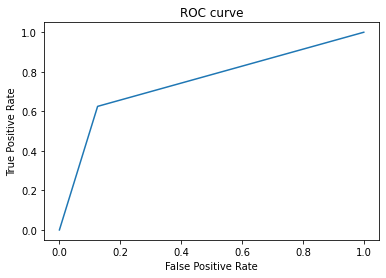

AUC value is 0.7497549019607843 


In [114]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

## SVC

In [115]:
param={'random_state':list(range(3,20)),'max_iter':[100,200,300,400,500,600,700,800,900,1000,1100],
      'gamma':[0.1,0.01,0.0001,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
      'C':[0.0001,0.001,0.01,1,2,3,4,5,6,7,8,9]}
gcv=RandomizedSearchCV(SVC(),param,cv=4)
gcv.fit(x_train_new,y_train_new)

RandomizedSearchCV(cv=4, estimator=SVC(),
                   param_distributions={'C': [0.0001, 0.001, 0.01, 1, 2, 3, 4,
                                              5, 6, 7, 8, 9],
                                        'gamma': [0.1, 0.01, 0.0001, 0.2, 0.3,
                                                  0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                                  1],
                                        'max_iter': [100, 200, 300, 400, 500,
                                                     600, 700, 800, 900, 1000,
                                                     1100],
                                        'random_state': [3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14, 15,
                                                         16, 17, 18, 19]})

In [116]:
gcv.best_params_

{'random_state': 9, 'max_iter': 400, 'gamma': 0.2, 'C': 3}

In [117]:
svc=SVC(random_state=9,max_iter=400,gamma=0.2,C=3)
svc.fit(x_train_new,y_train_new)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy Score is : ', score)

Accuracy Score is :  0.8530465949820788


## Roc AUC Curve

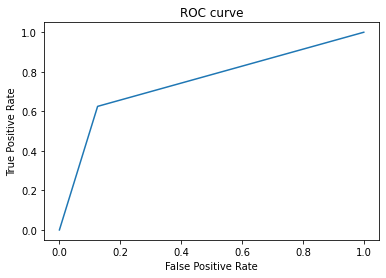

AUC value is 0.7497549019607843 


In [118]:
from sklearn.metrics import roc_curve,auc
fpr, tpr, threshold= roc_curve(y_pred,y_test)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()
print("AUC value is {} ".format(auc(fpr, tpr)))

 all the model accuracy  score is almost same. But Random Forest Classifier's AUC Score is highest then other  two.
 
 So we save The `RandomForestClassifier` model.
 
 ## Saving the model

In [119]:
import joblib
joblib.dump(rf,'IBM_HR_Analytics_prediction')

['IBM_HR_Analytics_prediction']